In [8]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### 1 - Linear Regression Impact on Outliers

In [12]:
X = np.arange(0, 10, 1)
Y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

model_lr = LinearRegression()
model_lr.fit(X.reshape(-1,1), Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(f'Weight(w) : {model_lr.coef_[0]}')
print(f'Intercept(b) : {model_lr.intercept_}')

Weight(w) : -3.557272727272728
Intercept(b) : 3.916727272727277


In [15]:
Y_hat_train = model_lr.predict(X.reshape(-1,1))

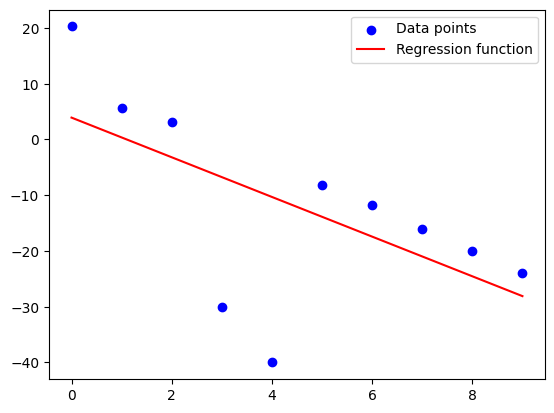

In [16]:
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_hat_train, color='red', label='Regression function')
plt.legend()
plt.show()

In [22]:
def loss_function(weight, intercept, X, Y, beta):
    cum_loss = 0
    for idx, x in enumerate(X):
        y_hat = weight * x + intercept
        loss = ((Y[idx] - y_hat)**2) / (((Y[idx] - y_hat)**2) + (beta**2))
        cum_loss = cum_loss + loss
    
    print(f'Beta : {beta}')
    print(f'Loss function value : {cum_loss/len(Y):.4f}')


In [23]:
beta_arr = [1, 1e-6, 1000]

for beta in beta_arr:
    loss_function(-4, 12, X, Y, beta=beta)

Beta : 1
Loss function value : 0.4354
Beta : 1e-06
Loss function value : 1.0000
Beta : 1000
Loss function value : 0.0002


In [24]:
for beta in beta_arr:
    loss_function(-3.55, 3.91, X, Y, beta=beta)

Beta : 1
Loss function value : 0.9728
Beta : 1e-06
Loss function value : 1.0000
Beta : 1000
Loss function value : 0.0002
